<h1 style="text-align:center;">
LLM Matrix
</h1> 

### Table Of Contents:
* [Workbook Filter](#1)
* [Matrix Plot](#2)

## **1** Filtering out Relevant Columns <a class="anchor" id="1"></a>

We only want the `model` name, `x_score`, and `y_score` for the final matrix from the _'LLM Matrix.xlsx'_ table

In [45]:
# Importing Librarires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Read in file
df = pd.read_excel(r'../data/LLM Matrix.xlsx')

In [48]:
# Have a look at the first few rows
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Business Rediness - > x-axis,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 22,Unnamed: 23,Unnamed: 24,Percieved Business Value --> y-axis,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,NaN,NaN,NaN,NaN,credibility,NaN,NaN,NaN,harmfulness,NaN,...,NaN,NaN,NaN,NaN,NaN,popularity,NaN,NaN,NaN,NaN
1,model,organisation,specialisation,created_at,cred_track_record,cred_endorsements,cred_recognition_reputable_institutes,cred_score,harm_incidents,harm_safeguards,...,estimated,bench_score,x_score,capabailities,success stories,pop_activity,pop_growth_rate,pop_variety,pop_score,y_score
2,GPT-4,OpenAI,General Purpose Model,2023-03-14 00:00:00,3,2,3,2.666667,2,3,...,NaN,3.040667,2.690967,3.108571,3.22,4,4,3.5,3.833333,3.317619
3,GPT-3,OpenAI,NaN,2020-06-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GPT-2,OpenAI,NaN,2019-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# The headers are in the second row (iloc[1]) so rename:
df.rename(columns=df.iloc[1], inplace = True)

In [51]:
# Drop the first two rows
df.drop([0,1], inplace = True)

In [55]:
# DataFrame with relevant coulmns only
relv_only = df[['model', 'x_score', 'y_score']]

In [56]:
# Have a look
relv_only

,model,x_score,y_score
2,GPT-4,2.690967,3.317619
3,GPT-3,NaN,NaN
4,GPT-2,NaN,NaN
5,Llama 3,2.421198,3.1
6,Gemini,1.649661,2.658333
7,T5,NaN,NaN
8,GPT-J,1.382527,1.258333
9,Megatron-LM,NaN,NaN
10,BLOOM,NaN,NaN
11,ERNIE 4.0,NaN,NaN


In [58]:
# Filter out rows with null scores (i.e. give df with both x and y scores)
relv_only.dropna(subset=['x_score', 'y_score'], inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_9040\2712994657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relv_only.dropna(subset=['x_score', 'y_score'], inplace=True)


In [60]:
# Have a look
relv_only

,model,x_score,y_score
2,GPT-4,2.690967,3.317619
5,Llama 3,2.421198,3.1
6,Gemini,1.649661,2.658333
8,GPT-J,1.382527,1.258333
12,BloombergGPT,2.969775,3.6945
15,EXAONE 2.0,2.749,1.956667


In [62]:
# Save as file
relv_only.to_csv(r'../data/relevant_cols_only.csv', encoding='utf-8', index=False)

# **2** LLM Matrix Plot <a class="anchor" id="2"></a>
Plot the matrix!

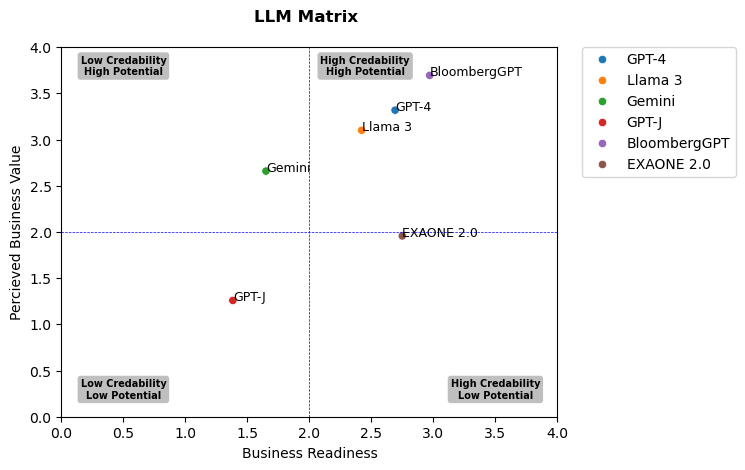

In [91]:
## Plot the datapoints
sns.scatterplot(data=relv_only,
                x = 'x_score',
                y='y_score',
                hue = 'model',
                #legend = False
               )

## Adjust Axis Range
 # Set the x-axis range
plt.xlim([0, 4])
 # Set the y-axis range
plt.ylim([0, 4])

## Add Quadrant Lines
 # Add a vertical line at x=2
plt.axvline(x=2, color='b', linestyle='--', linewidth=0.5)
 # Add a horizontal line at y=2
plt.axhline(y=2, color='b', linestyle='--', linewidth=0.5)

## Label the Graph
 # Add graph title
plt.title('LLM Matrix \n',
          fontweight = 'bold' )
 # Rename x-axis
plt.xlabel('Business Readiness')
 # Rename y-axis
plt.ylabel('Percieved Business Value')

## Place the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), 
           loc='upper left', 
           borderaxespad=0.)

## Annotate each point with its model name
for i in range(len(relv_only)):
    plt.text(x=relv_only.iloc[i]['x_score'], 
             y=relv_only.iloc[i]['y_score'], 
             s=relv_only.iloc[i]['model'],
             fontsize=9, 
             ha='left')
    
## Label each quadrant
 # Define properties for the grey box underneath labels
bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="none", facecolor="grey", alpha=0.5)
 # Top-right quadrant
plt.text(2.45, 3.7, 'High Credability\nHigh Potential', fontsize=7, ha='center', fontweight='bold', bbox=bbox_props)
 # Top-left quadrant
plt.text(0.5, 3.7, 'Low Credability\nHigh Potential', fontsize=7, ha='center', fontweight='bold', bbox=bbox_props)
 # Bottom-right quadrant
plt.text(3.5, 0.2, 'High Credability\nLow Potential', fontsize=7, ha='center', fontweight='bold', bbox=bbox_props)
 # Bottom-left quadrant
plt.text(0.5, 0.2, 'Low Credability\nLow Potential', fontsize=7, ha='center', fontweight='bold', bbox=bbox_props)

## Show plot
plt.show()